<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/PortugalBankHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
pip install ucimlrepo

In [61]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [62]:
import pandas as pd
import math

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [64]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [65]:
df= pd.concat([X,y], axis=1)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [66]:
df.nunique()

,0
age,77
job,11
marital,3
education,3
default,2
balance,7168
housing,2
loan,2
contact,2
day_of_week,31


In [67]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [68]:
features = df.columns[ df.columns != "y" ]
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [69]:
target = "y"
attribute = "marital"

In [70]:
vals = df[ attribute].unique()
vals

array(['married', 'single', 'divorced'], dtype=object)

In [71]:
props = df[ df[attribute] == vals[1] ][target].value_counts( normalize=True )
props

,proportion
y,
no,0.850508
yes,0.149492


In [72]:
entropy = 0
for p in props.array:
  entropy = entropy - p*math.log2(p)
entropy

0.6085670475765929

In [73]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props.iloc[i]*math.log2( props.iloc[i] )
entropy

0.6085670475765929

In [74]:
entropy = 0
overall = len( df )
for val in vals:
  subset_size = len(df[ df[attribute] == val ])
  weight = subset_size / overall
  props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))

entropy

0.5175998043005658

GET FEATURE W LOwest entropy, if object only need to return name, if numerical need number and name

In [75]:
df = pd.concat( [X,y], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [76]:
target = "y"
feature = "age"

In [77]:
vals = df[ "age" ].unique()
vals.sort()
vals

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95])

In [78]:
overall = len( df )
entropies = []
for val in vals:
  entropy = 0
  left = df[ df[feature] <= val ][ [feature,target] ]
  props = left[ target ].value_counts( normalize = True )
  weight = len( left ) / overall
  for prop in props.array:
    entropy = entropy - weight*prop*math.log2( prop )
  right = df[ df[feature] > val ][ [feature,target] ]
  props = right[ target ].value_counts( normalize = True )
  weight = len( right ) / overall
  for prop in props.array:
    entropy = entropy - weight*prop*math.log2( prop )
  entropies.append(entropy)

In [79]:
pd.Series( entropies ).idxmin()

42

In [80]:
entropies[3]

0.519869064367314

In [81]:
vals[3]

21

#**Second Part of HW (Decision Tree)**






In [82]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [84]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [85]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [86]:
train_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [87]:
train_set = train_set[["marital", "job", "age", "poutcome", "balance", "y"]]

In [88]:
test_set = test_set[["marital", "job", "age", "poutcome", "balance", "y"]]

In [89]:
X_train = train_set[["marital", "job", "age", "poutcome", "balance"]]
y_train = train_set["y"]

In [90]:
X_test = train_set[["marital", "job", "age", "poutcome", "balance"]]
y_test = train_set["y"]

In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 32942 to 22849
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   marital   36168 non-null  object
 1   job       35933 non-null  object
 2   age       36168 non-null  int64 
 3   poutcome  6573 non-null   object
 4   balance   36168 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

FILTER COLUMNS TO SEE IF FLOAT/INT ARE ACTUALLY THOSE

In [94]:
cat_attributes = ["marital", "job", "poutcome"]
num_attributes = ["age", "balance"]

In [95]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])
print(X_train.columns)

In [96]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [97]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.8920376 , 0.89397291, 0.89646116, 0.89368174, 0.89188442])

In [98]:
df["prediction"] = (df["age"] > 25).map({True: 'yes', False: 'no'})

In [99]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'job',
                                                   'poutcome'])])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [100]:
test_predictions = pipeline.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, test_predictions )
cm

array([[31539,   422],
       [ 3424,   783]])

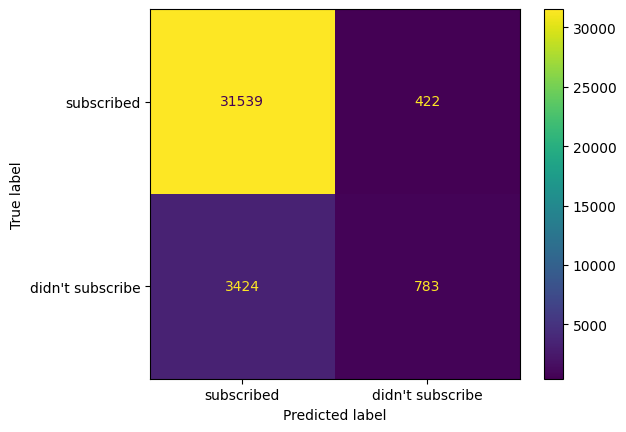

In [102]:
ConfusionMatrixDisplay( cm, display_labels=["subscribed","didn't subscribe"]).plot()

In [103]:
tn, fp, fn, tp = confusion_matrix( df["y"], df["prediction"]).ravel()
tn, fp, fn, tp

(1016, 38906, 320, 4969)

FIND METRICS LIKE RECALL AND PRECISION

In [104]:
import sklearn.metrics as metrics

In [105]:
metrics.recall_score( df["y"], df["prediction"], pos_label = 'yes')

0.9394970693892986

In [106]:
tp / (tp + fn)

0.9394970693892986

In [107]:
metrics.precision_score( df["y"], df["prediction"], pos_label = 'yes')

0.11325356125356126

In [108]:
tp / (tp + fp)

0.11325356125356126

[Text(0.5, 0.875, 'x[19] <= 0.5\ngini = 0.207\nsamples = 45211\nvalue = [39922, 5289]'),
 Text(0.25, 0.625, 'x[0] <= 1.842\ngini = 0.178\nsamples = 43700\nvalue = [39389, 4311]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 0.5\ngini = 0.168\nsamples = 42711\nvalue = [38758, 3953]'),
 Text(0.0625, 0.125, 'gini = 0.144\nsamples = 30475\nvalue = [28090, 2385]'),
 Text(0.1875, 0.125, 'gini = 0.223\nsamples = 12236\nvalue = [10668, 1568]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\ngini = 0.462\nsamples = 989\nvalue = [631, 358]'),
 Text(0.3125, 0.125, 'gini = 0.451\nsamples = 817\nvalue = [536, 281]'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 172\nvalue = [95, 77]'),
 Text(0.75, 0.625, 'x[0] <= -1.642\ngini = 0.457\nsamples = 1511\nvalue = [533, 978]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 0.5\ngini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.5625, 0.125, 'gini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\n

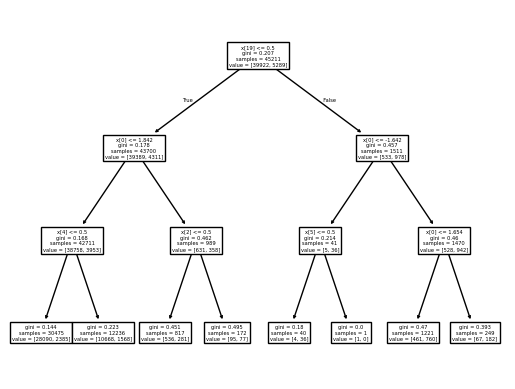

In [109]:
pipeline.fit(X,y)
plot_tree( pipeline.named_steps['clf'])

In [110]:
def precision_vs_recall( threshold ):
  df["prediction"] = df["age"] > threshold
  df['prediction'] = df['prediction'].map({True: 'yes', False: 'no'})
  return metrics.precision_score( df["y"], df["prediction"], pos_label ='yes'), metrics.recall_score( df["y"], df["prediction"], pos_label ='yes')

In [112]:
precisions = []
recalls = []
thresholds = range(25,95)
for threshold in thresholds:
  precision, recall = precision_vs_recall( threshold )
  precisions.append( precision )
  recalls.append( recall )

In [113]:
pr = pd.DataFrame( {
    "threshold": thresholds,
    "precision": precisions,
    "recall": recalls
})

In [114]:
pr.tail()

,threshold,precision,recall
65,90,0.714286,0.000945
66,91,0.714286,0.000945
67,92,0.600000,0.000567
68,93,0.333333,0.000189
69,94,0.500000,0.000189


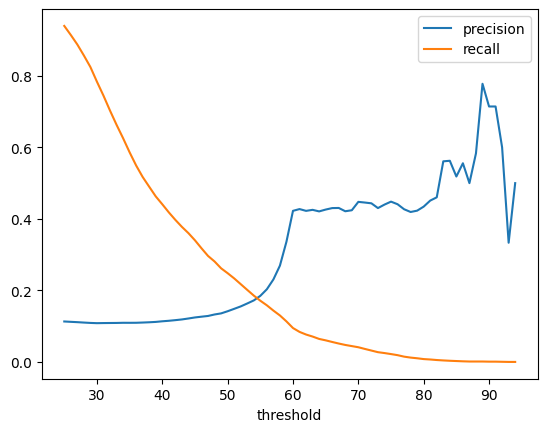

In [115]:
pr.plot( x="threshold", y=["precision","recall"]);

GRID SEARCH SECTION OF HW DUE ON 10/4

In [116]:
from sklearn.model_selection import GridSearchCV